# 시계열 데이터 분석 with Pandas
* Time Series with Pandas
* 시계열 데이터 특성
* ETS 모델
* SMA, WMA, SES 모델
* ARIMA 모델

시계열 데이터는 시간 데이터를 인덱스로 하는 연속된 데이터 입니다.

시간 데이터를 Python의 DateTime타입으로 바꾸어 Pandas가 제공하는 시계열 데이터를 처리하는 아래 기능들을 학습합니다.

* DateTime 인덱스
* Time Resampling
* Time Shifts
* Rolling and Expanding

* DateTime Index
  * time 또는 date 정보는 별개의 칼럼이기보다 인덱스인 경우가 많습니다.

  * Pandas에 내장된 기능들로 DateTime인덱스를 생성하고 활용하는 방법을 다룹니다.

* Time Resampling
  * 시계열 데이터의 인덱스는 시(hours), 분(minutes) 등 작은 단위 DateTime인덱스로 이뤄진 경우도 많습니다.
  * 더 넓은 주기로 데이터를 집계(aggregate) 해야 하는 경우 Time Resampling이 필요합니다.
  * groupby를 사용함으로써 Time Resampling을 수행할 수는 있지만, 비지니스 도메인에서 분기나 회계년도를 편리하게 처리할 방법은 못됩니다.
  * Pandas는 이런 경우에 활용할 수 있는 frequency sampling 도구를 지원합니다.

* Time Shifts
  * 시계열 분석 알고리즘을 사용하기 위해 데이터를 임의 시간만큼 앞 또는 뒤로 이동시켜야 할 때가 있습니다.
  * Pandas는 이런 경우에도 매우 쉬운 방법을 제공합니다.

* Rolling and Expanding
  * 매일 수집한 데이터들에는 노이즈가 포함되기도 합니다.
  * 이럴 경우 데이터의 일반적인 트렌드를 구하기 위해 rolling mean (또는 moving average)을 사용하기도 합니다.
  * Pandas에 내장된 rolling 함수를 이용하면 주어진 시한 내 평균(rolling mean) 등을 구할 수 있습니다.
  * 임의 시간 간격의 window를 만들고 그 안에서 mean 같은 통계적 aggregation을 실행하면 됩니다.

* 볼린저 밴드 (Bollinger Band)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from datetime import datetime

In [ ]:
today = datetime(2021,2,22)

In [ ]:
today

datetime.datetime(2021, 2, 22, 0, 0)

In [ ]:
today.day

22

In [ ]:
today.year

2021

In [ ]:
today.month

2

In [ ]:
dates = [datetime(2021,2,21),datetime(2021,2,22)]
dates

[datetime.datetime(2021, 2, 21, 0, 0), datetime.datetime(2021, 2, 22, 0, 0)]

In [ ]:
dt_index = pd.DatetimeIndex(dates)
dt_index

DatetimeIndex(['2021-02-21', '2021-02-22'], dtype='datetime64[ns]', freq=None)

In [ ]:
data = np.random.randn(2,2)

In [ ]:
cols = ['A','B']

In [ ]:
df = pd.DataFrame(data=data, index=dt_index, columns=cols)

In [ ]:
df.index.max()

Timestamp('2021-02-22 00:00:00')

In [ ]:
df.index.min()

Timestamp('2021-02-21 00:00:00')

In [ ]:
df.index.argmax()

1

In [ ]:
df.index.argmin()

0

# RESAMPLING

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tacademy_timeseries/apple_stock.csv')

In [ ]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
1,2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2,2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
3,2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
4,2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2265 non-null   object 
 1   High       2265 non-null   float64
 2   Low        2265 non-null   float64
 3   Open       2265 non-null   float64
 4   Close      2265 non-null   float64
 5   Volume     2265 non-null   float64
 6   Adj Close  2265 non-null   float64
dtypes: float64(6), object(1)
memory usage: 124.0+ KB


In [ ]:
df['Date'] = df['Date'].apply(pd.to_datetime)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2265 non-null   datetime64[ns]
 1   High       2265 non-null   float64       
 2   Low        2265 non-null   float64       
 3   Open       2265 non-null   float64       
 4   Close      2265 non-null   float64       
 5   Volume     2265 non-null   float64       
 6   Adj Close  2265 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 124.0 KB


In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2265 entries, 2009-12-31 to 2018-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2265 non-null   float64
 1   Low        2265 non-null   float64
 2   Open       2265 non-null   float64
 3   Close      2265 non-null   float64
 4   Volume     2265 non-null   float64
 5   Adj Close  2265 non-null   float64
dtypes: float64(6)
memory usage: 123.9 KB


In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369
...,...,...,...,...,...,...
2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002
2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994


In [ ]:
df.index.month

Int64Index([12,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Date', length=2265)

In [ ]:
df['month'] = df.index.month

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,12
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,1
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902,1
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680,1
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369,1


In [ ]:
df.groupby('month').agg(sum) # 월별 합계 계산

,High,Low,Open,Close,Volume,Adj Close
month,,,,,,
1,16141.351418,15840.451458,16007.617104,15989.401403,1.748822e+10,14038.491524
2,15739.942860,15445.045748,15572.844261,15607.478556,1.511651e+10,13799.143261
3,18676.318544,18358.607164,18522.812897,18516.759998,1.646522e+10,16387.278601
4,17763.422855,17444.350006,17612.804337,17595.992851,1.656252e+10,15549.686649
5,18874.642849,18552.902849,18711.531479,18731.747120,1.595049e+10,16741.255772
6,19040.630035,18743.354290,18909.838608,18881.168510,1.427367e+10,16927.685444
7,18908.574245,18616.531422,18760.998562,18775.181419,1.403693e+10,16779.291849
8,21322.417149,20943.891430,21113.692909,21152.527245,1.505109e+10,19060.226547
9,19596.267178,19222.517181,19423.325752,19400.800022,1.547466e+10,17478.810833


In [ ]:
df.groupby(df.index.year).sum() # 연도별 합계

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009,30.478571,30.080000,30.447144,30.104286,8.810270e+07,20.159719,12
2010,9445.277117,9246.514246,9358.474289,9354.328560,3.775623e+10,6264.245874,1659
2011,13227.248539,12970.717155,13106.211399,13104.155712,3.101483e+10,8775.365667,1650
2012,20779.478600,20354.327164,20594.740028,20573.204269,3.299105e+10,14019.096821,1625
2013,17195.001381,16856.895695,17032.612881,17014.855690,2.560539e+10,13377.068882,1649
2014,23439.191429,23051.835686,23239.397186,23250.692886,1.591449e+10,21242.415085,1651
2015,30553.620010,29953.500031,30284.289993,30250.079948,1.306315e+10,28458.719048,1655
2016,26567.650009,26129.949989,26335.959984,26360.209991,9.680622e+09,25313.373260,1652
2017,38002.920044,37521.400078,37761.670013,37788.319946,6.810426e+09,36972.054916,1640


In [ ]:
df.groupby([df.index.year, df.index.month]).agg(sum)

High          Low  ...    Adj Close  month
Date Date                            ...                    
2009 12      30.478571    30.080000  ...    20.159719     12
2010 1      573.331425   557.244289  ...   377.554930     19
     2      544.092857   532.875715  ...   361.342400     38
     3      738.235716   727.080000  ...   491.575537     69
     4      759.410004   744.359997  ...   504.554579     84
...                ...          ...  ...          ...    ...
2018 8     4934.909988  4860.029999  ...  4884.851288    184
     9     4266.080002  4181.480011  ...  4204.729004    171
     10    5150.640030  5011.109985  ...  5061.788559    230
     11    4072.939987  3962.709976  ...  4012.316437    231
     12    3179.080017  3075.930023  ...  3121.060028    228

[109 rows x 7 columns]

In [ ]:
df.resample(rule='A').sum()

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,8.810270e+07,20.159719,12
2010-12-31,9445.277117,9246.514246,9358.474289,9354.328560,3.775623e+10,6264.245874,1659
2011-12-31,13227.248539,12970.717155,13106.211399,13104.155712,3.101483e+10,8775.365667,1650
2012-12-31,20779.478600,20354.327164,20594.740028,20573.204269,3.299105e+10,14019.096821,1625
2013-12-31,17195.001381,16856.895695,17032.612881,17014.855690,2.560539e+10,13377.068882,1649
2014-12-31,23439.191429,23051.835686,23239.397186,23250.692886,1.591449e+10,21242.415085,1651
2015-12-31,30553.620010,29953.500031,30284.289993,30250.079948,1.306315e+10,28458.719048,1655
2016-12-31,26567.650009,26129.949989,26335.959984,26360.209991,9.680622e+09,25313.373260,1652
2017-12-31,38002.920044,37521.400078,37761.670013,37788.319946,6.810426e+09,36972.054916,1640


In [ ]:
df.resample(rule='A').mean()['2009']

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,30.478571,30.08,30.447144,30.104286,88102700.0,20.159719,12.0


In [ ]:
def first_day(sample):
  return sample[0]

In [ ]:
df.resample(rule='A').apply(first_day)

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,12
2010-12-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,1
2011-12-31,47.180000,46.405716,46.520000,47.081429,111284600.0,31.528688,1
2012-12-31,58.928570,58.428570,58.485714,58.747143,75555200.0,39.340778,1
2013-12-31,79.285713,77.375717,79.117142,78.432854,140129500.0,55.923737,1
2014-12-31,79.575714,78.860001,79.382858,79.018570,58671200.0,67.251503,1
2015-12-31,111.440002,107.349998,111.389999,109.330002,53204600.0,101.963631,1
2016-12-31,105.370003,102.000000,102.610001,105.349998,67649400.0,99.925850,1
2017-12-31,116.330002,114.760002,115.800003,116.150002,28781900.0,112.620964,1


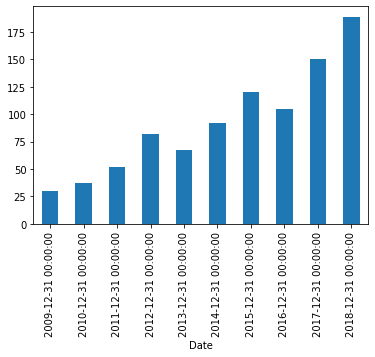

In [ ]:
df['Close'].resample('A').mean().plot(kind='bar')

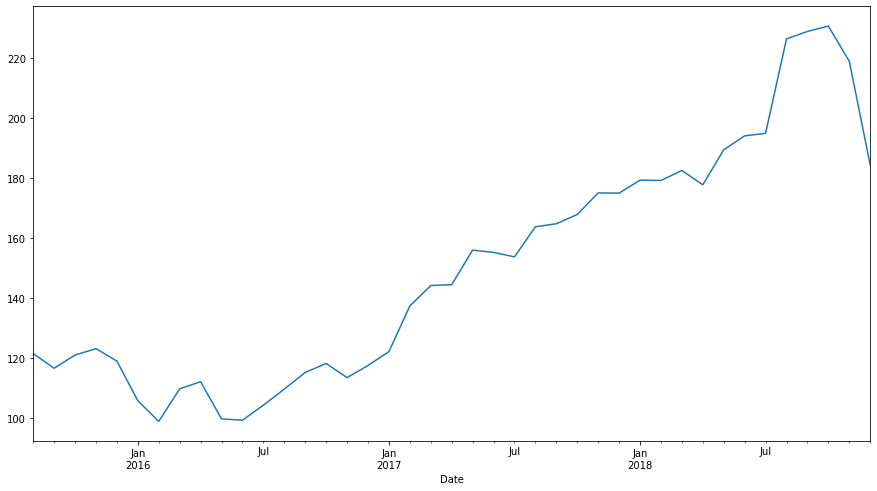

In [ ]:
df['Open']['2015-8':].resample('M').max().plot(figsize=(15,8))

In [ ]:
daily_daterange = \
pd.date_range(start=datetime(2018,9,1),
              end=datetime(2019,1,24),
              freq='B') # 비즈니스데이 : 주말을 뺀 날

In [ ]:
daily_daterange = \
pd.DataFrame({'value':np.random.rand(len(daily_daterange))},
             index=daily_daterange)

In [ ]:
daily_daterange.head(10)

,value
2018-09-03,0.667086
2018-09-04,0.121293
2018-09-05,0.986272
2018-09-06,0.742815
2018-09-07,0.986217
2018-09-10,0.448082
2018-09-11,0.820114
2018-09-12,0.362062
2018-09-13,0.725667
2018-09-14,0.228702


In [ ]:
daily_daterange.resample('W-MON').min()

,value
2018-09-03,0.667086
2018-09-10,0.121293
2018-09-17,0.228702
2018-09-24,0.106179
2018-10-01,0.013008
2018-10-08,0.069802
2018-10-15,0.172782
2018-10-22,0.494739
2018-10-29,0.048949
2018-11-05,0.296644


In [ ]:
daily_daterange.resample('M').min()

,value
2018-09-30,0.013008
2018-10-31,0.048949
2018-11-30,0.001683
2018-12-31,0.027341
2019-01-31,0.020111


# SHIFTING

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tacademy_timeseries/apple_stock.csv', index_col='Date')

In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369
...,...,...,...,...,...,...
2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002
2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994


In [ ]:
df.index # dtype='object'

Index(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
       '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14',
       ...
       '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
       '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31'],
      dtype='object', name='Date', length=2265)

In [ ]:
df.index = pd.to_datetime(df.index)

In [ ]:
df.index # dtype='datetime64'

DatetimeIndex(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=2265, freq=None)

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [ ]:
temp = np.asarray(df['Close']) # 종가(='Close')를 넘파이어레이(넘파이배열)로 만들어서 temp 변수에 저장

In [ ]:
temp

array([ 30.10428619,  30.5728569 ,  30.62571335, ..., 156.1499939 ,
       156.22999573, 157.74000549])

In [ ]:
temp[:-1]

array([ 30.10428619,  30.5728569 ,  30.62571335, ..., 157.16999817,
       156.1499939 , 156.22999573])

In [ ]:
temp[1:]

array([ 30.5728569 ,  30.62571335,  30.13857079, ..., 156.1499939 ,
       156.22999573, 157.74000549])

In [ ]:
df.shift(1).head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-05,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-06,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-07,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680


In [ ]:
df.shift(1).tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,158.160004,149.630005,156.860001,150.729996,95744600.0,150.729996
2018-12-26,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002
2018-12-27,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2018-12-28,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994
2018-12-31,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996


In [ ]:
df.shift(-1).head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-04,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-05,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-06,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369
2010-01-07,30.285715,29.865715,30.042856,30.282858,111902700.0,20.279305


In [ ]:
df.shift(-1).tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2018-12-26,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994
2018-12-27,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996
2018-12-28,159.360001,156.479996,158.529999,157.740005,35003500.0,157.740005
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tshift(freq='M', periods=1).head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-31,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-31,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-31,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


# Rolling & Expanding

In [ ]:
# parse_dates = True 옵션
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tacademy_timeseries/apple_stock.csv',
                 index_col='Date',
                 parse_dates=True)

In [ ]:
df.index

DatetimeIndex(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=2265, freq=None)

In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369
...,...,...,...,...,...,...
2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002
2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994


In [ ]:
# parse_dates = 직접 지정 옵션
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tacademy_timeseries/apple_stock.csv',
                 index_col='Date',
                 parse_dates=['Date'])

In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369
...,...,...,...,...,...,...
2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002
2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994


In [ ]:
df.index

DatetimeIndex(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=2265, freq=None)

In [ ]:
def dateparser(str_dt):
  return pd.datetime.strptime(str_dt, "%Y-%m-%d") # string 인자로 받아서 지정한 포맷으로 읽어준다.

In [ ]:
dateparser('2019-01-01')

datetime.datetime(2019, 1, 1, 0, 0)

In [ ]:
# date_parser 옵션
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tacademy_timeseries/apple_stock.csv',
                 index_col='Date',
                 parse_dates=['Date'],
                 date_parser=dateparser)

In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369
...,...,...,...,...,...,...
2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002
2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994


In [ ]:
# rolling().mean() : moving average와 같은 트렌드를 구하기 위해서 많이 사용되는 함수이다.
df.rolling(7).mean().head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,30.523878,30.071429,30.416122,30.260408,120970600.0,20.264270
2010-01-12,30.450816,29.986939,30.335714,30.198980,129615200.0,20.223133
2010-01-13,30.377959,29.817959,30.222245,30.130408,133621000.0,20.177213


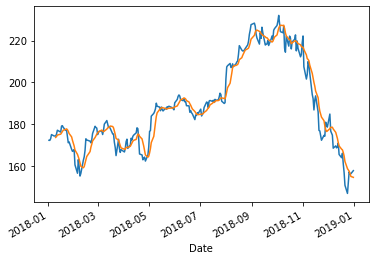

In [ ]:
# 주식의 마감가격(종가)의 트렌드를 보고싶다.
df['2018']['Close'].plot() # 종가 원래 데이터
df['2018'].rolling(window=7).mean()['Close'].plot() # 종가의 트렌드

In [ ]:
# 30일 평균 종가 컬럼 만들기
df['Close : 30 Day Mean'] = df['Close'].rolling(30).mean()

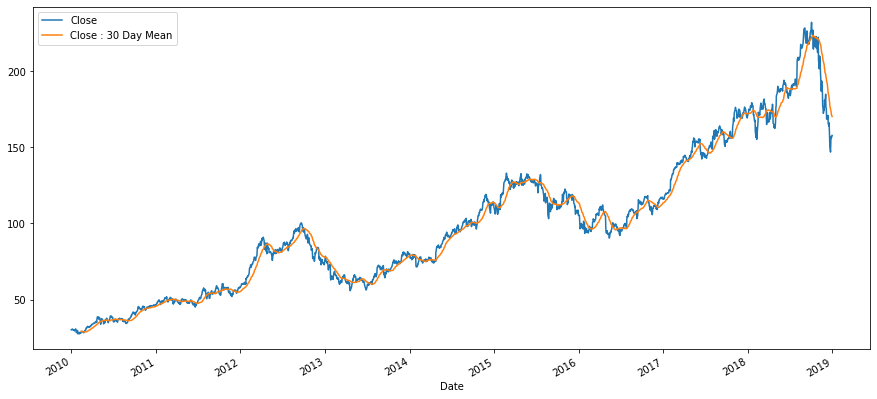

In [ ]:
df[['Close', 'Close : 30 Day Mean']].plot(figsize=(15,7))

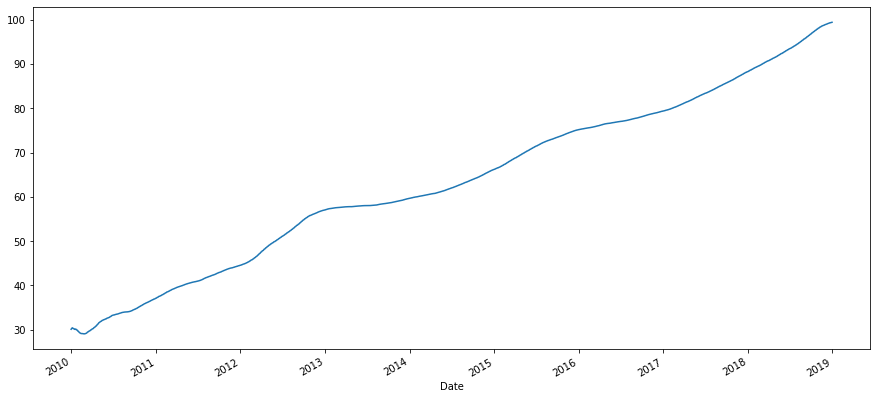

In [ ]:
# expanding 해가면서 누적된 close 데이터에 대한 누적 평균을 plotting 해본 것
df['Close'].expanding(min_periods=1).mean().plot(figsize=(15,7))

# 볼린저 밴드

#### df['Close'] std 2 -2 20일치 MA (20일단위의 평균 트렌드 값)
#### 종가에 대한 20일치 rolling mean을 구하고
#### 종가에 대해서 위아래로 std을 구해서 2를 곱해서 더해준다.
---
#### 전체 흐름
df['Close: 20Day Mean'] = df['Close'].rolling...

df['Upper'] = df['Close: 20Day Mean'] + 2 std Close

df['Lower'] = df['Close: 20Day Mean'] - 2 std Close

df[['Close', 'Close: 20Day Mean', 'Upper', 'Lower']].plot()

---

20일치의 트렌드를 보고

그 트렌드가 2 std 위에 있으면 사야할 때고

그 트렌드가 2 std 아래에 있으면 팔아야할 때이다

In [ ]:
df['Close: 20Day Mean'] = df['Close'].rolling(window=20).mean()
print(df['Close: 20Day Mean'])

Date
2009-12-31           NaN
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
                 ...    
2018-12-24    169.085002
2018-12-26    168.212502
2018-12-27    167.308002
2018-12-28    166.072501
2018-12-31    164.982001
Name: Close: 20Day Mean, Length: 2265, dtype: float64


In [ ]:
df['Upper'] = df['Close: 20Day Mean'] + 2*df['Close'].rolling(20).std()
print(df['Upper'])

Date
2009-12-31           NaN
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
                 ...    
2018-12-24    188.750620
2018-12-26    188.385985
2018-12-27    187.960084
2018-12-28    186.241665
2018-12-31    184.428450
Name: Upper, Length: 2265, dtype: float64


In [ ]:
df['Lower'] = df['Close: 20Day Mean'] - 2*df['Close'].rolling(20).std()
print(df['Lower'])

Date
2009-12-31           NaN
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
                 ...    
2018-12-24    149.419384
2018-12-26    148.039020
2018-12-27    146.655919
2018-12-28    145.903338
2018-12-31    145.535553
Name: Lower, Length: 2265, dtype: float64


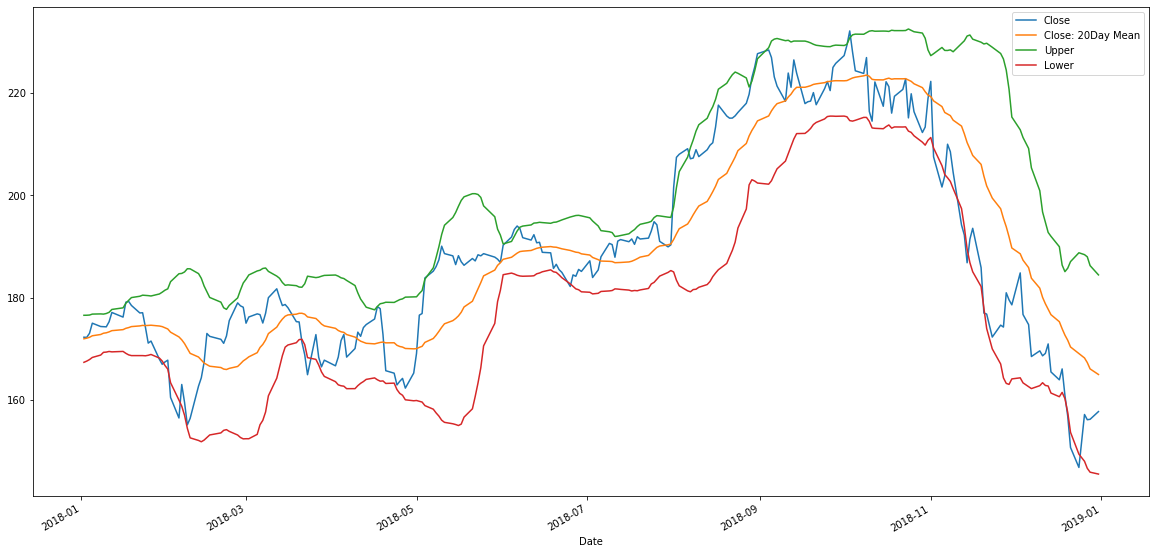

In [ ]:
df['2018':][['Close','Close: 20Day Mean','Upper','Lower']].plot(figsize=(20,10))

# Timezone

In [ ]:
from datetime import datetime
from datetime import timezone
timezone.utc

datetime.timezone.utc

In [ ]:
datetime(2019,1,1) # timezone unawared datetime : 타임존이 어딘지 모른다.

datetime.datetime(2019, 1, 1, 0, 0)

In [ ]:
datetime(2019,1,1,tzinfo=timezone.utc) # timezone awared datetime : 타임존 지정 >> utc시간 명시

datetime.datetime(2019, 1, 1, 0, 0, tzinfo=datetime.timezone.utc)

In [ ]:
import pytz

In [ ]:
pytz.utc

<UTC>

In [ ]:
pytz.timezone('Asia/Seoul')

<DstTzInfo 'Asia/Seoul' LMT+8:28:00 STD>

In [ ]:
datetime(2019,1,1,tzinfo=timezone.utc) == \
pytz.UTC.localize(datetime(2019,1,1))
# \ : 줄바꿈

True

In [ ]:
KST = pytz.timezone('Asia/Seoul')
KST.localize(datetime(2019,1,1))

datetime.datetime(2019, 1, 1, 0, 0, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [ ]:
datetime(2019,1,1,tzinfo=timezone.utc) == \
KST.localize(datetime(2019,1,1))

False

In [ ]:
mydate = datetime(2019,1,1)

In [ ]:
mydate.replace(year=2018)

datetime.datetime(2018, 1, 1, 0, 0)

In [ ]:
# 어떤 시간에 대해서 타임존을 설정할 때는
# replace를 사용하지 말고
# 위에서 보이는 것처럼 timezone에다가 localize를 한 다음에
# datetime 객체를 넘겨줘서 return을 받아야지 정확하게 계산이 된다.
mydate.replace(tzinfo=KST) # 이렇게 replace를 쓰면 아래 결과처럼 8:28:00과 같이 부정확하게 뜬다.

datetime.datetime(2019, 1, 1, 0, 0, tzinfo=<DstTzInfo 'Asia/Seoul' LMT+8:28:00 STD>)

In [ ]:
mydate_kst = KST.localize(mydate)

In [ ]:
mydate_kst

datetime.datetime(2019, 1, 1, 0, 0, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [ ]:
mydate_kst.astimezone(pytz.utc)

datetime.datetime(2018, 12, 31, 15, 0, tzinfo=<UTC>)

In [ ]:
mydate_kst.astimezone(pytz.utc) == mydate_kst # 같은 시간임을 알 수 있다.

True

In [ ]:
mydate_kst.strftime("%Y-%m-%d %H:%M:%S%Z") # strftime : 시간 저장할 때 사용

'2019-01-01 00:00:00KST'

In [ ]:
mydate_kst.astimezone(pytz.utc).strftime("%Y-%m-%d %H:%M:%S%Z") # string으로 비교해도 다르게 나오지만 같은 시간이다.

'2018-12-31 15:00:00UTC'

In [ ]:
datetime.today() # 현재시각

datetime.datetime(2021, 2, 24, 5, 44, 39, 710422)

In [ ]:
datetime.utcnow().astimezone(KST) # 전세계 어디에서든 똑같은 시간이 나오는 코드

datetime.datetime(2021, 2, 24, 14, 47, 25, 712730, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [ ]:
today = datetime.today()

In [ ]:
today.weekday() # 오늘의 요일 : 월요일이 0, 일요일이 6이다.

2

In [ ]:
datetime(2019,1,23).weekday()

2

In [ ]:
# 문제 : 가장 최근의 금요일을 구현하라
def last_friday():
  today = KST.localize(datetime.today()) # 오늘 설정
  offset = 4 - today.weekday() % 4
  aweekago = today - timedelta(weeks=1)
  # aweekago = today.replace(day=today.day - 7)
  last_friday = aweekago + timedelta(days=offset)
  # last_friday = aweekago.replace(day=aweekago.day+offset)
  return last_friday

In [ ]:
last_friday()

datetime.datetime(2021, 2, 19, 6, 0, 31, 735813, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [ ]:
# 두 날짜와 시간 사이의 차이를 계산할 때 사용
from datetime import timedelta

In [ ]:
# 특히 datetime.datetime 객체에서 datetime.datetime 객체를 빼면
# datetime.timedelta 객체가 나온다.
pytz.utc.localize(mydate) - KST.localize(mydate)

datetime.timedelta(seconds=32400)

In [ ]:
# 즉, datetime.datetime 객체에서
# datetime.timedelta를 빼면 이전 날짜와 시간을 구하고,
# 더하면 이후 날짜와 시간을 구합니다.
pytz.utc.localize(mydate) + timedelta(seconds=32400)

datetime.datetime(2019, 1, 1, 9, 0, tzinfo=<UTC>)

# 시계열 데이터 시각화

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df_apple = \
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tacademy_timeseries/apple_stock.csv',
            index_col='Date',
            parse_dates=True)

In [ ]:
df_apple

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369
...,...,...,...,...,...,...
2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002
2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994


In [ ]:
df_apple[['Volume', 'Adj Close']]

,Volume,Adj Close
Date,,
2009-12-31,88102700.0,20.159719
2010-01-04,123432400.0,20.473503
2010-01-05,150476200.0,20.508902
2010-01-06,138040000.0,20.182680
2010-01-07,119282800.0,20.145369
...,...,...
2018-12-24,37169200.0,146.830002
2018-12-26,58582500.0,157.169998
2018-12-27,53117100.0,156.149994


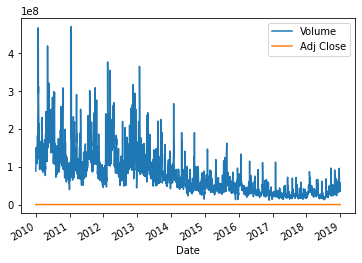

In [ ]:
df_apple[['Volume', 'Adj Close']].plot()

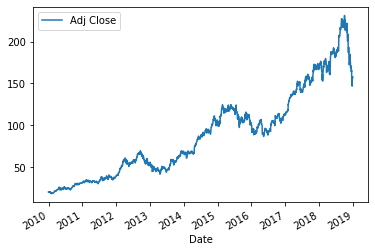

In [ ]:
# 폭이 넓지 않아서 위의 그림에서는 일정한 것처럼 나타난다.
df_apple[['Adj Close']].plot()

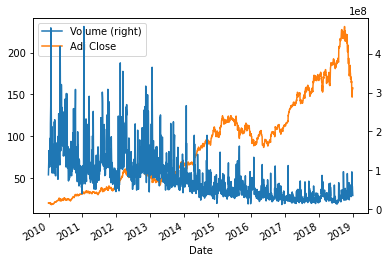

In [ ]:
# y축 범위 다르게 해서 한번에 그래프 두 개 그리기 : secondary_y 옵션 사용!
df_apple[['Volume', 'Adj Close']].plot(secondary_y=['Volume'])

Text(0.5, 1.0, 'APPLE')

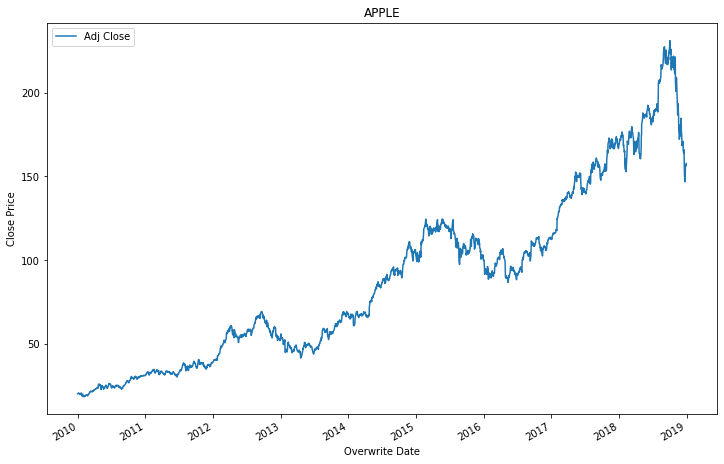

In [ ]:
df_apple[['Adj Close']].plot(figsize=(12,8))
plt.ylabel('Close Price')
plt.xlabel('Overwrite Date')
plt.title('APPLE')

In [ ]:
df_apple['Adj Close']['2015-01-01':'2018-01-01'] # 범위 지정

Date
2015-01-02    101.963631
2015-01-05     99.091148
2015-01-06     99.100471
2015-01-07    100.490089
2015-01-08    104.351151
                 ...    
2017-12-22    172.421402
2017-12-26    168.047089
2017-12-27    168.076645
2017-12-28    168.549545
2017-12-29    166.726913
Name: Adj Close, Length: 755, dtype: float64

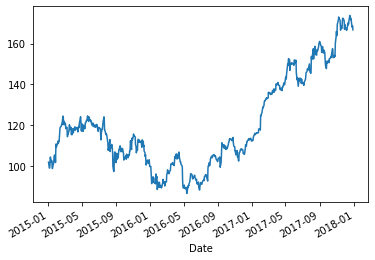

In [ ]:
df_apple['Adj Close']['2015-01-01':'2018-01-01'].plot()

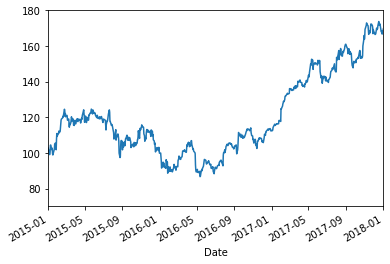

In [ ]:
df_apple['Adj Close'].plot(xlim=['2015-01-01','2018-01-01'],
                           ylim=[70, 180])

In [ ]:
index = df_apple['2015-01-01':'2018-01-01'].index
stock = df_apple['2015-01-01':'2018-01-01']['Adj Close']
print(index)
print('='*50)
print(stock)

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=755, freq=None)
Date
2015-01-02    101.963631
2015-01-05     99.091148
2015-01-06     99.100471
2015-01-07    100.490089
2015-01-08    104.351151
                 ...    
2017-12-22    172.421402
2017-12-26    168.047089
2017-12-27    168.076645
2017-12-28    168.549545
2017-12-29    166.726913
Name: Adj Close, Length: 755, dtype: float64


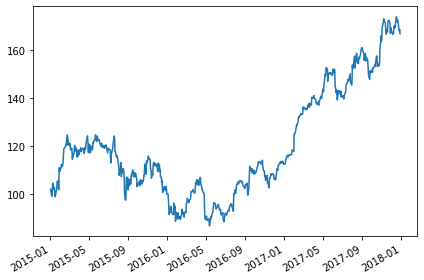

In [ ]:
fig, ax = plt.subplots()
ax.plot_date(index, stock, '-')
fig.autofmt_xdate() # x축 이름들끼리 겹치는 것을 알아서 고쳐서 눕혀준다.
plt.tight_layout() # 그래프들 끼리 겹쳐서 출력될 때 사용해보는 메소드

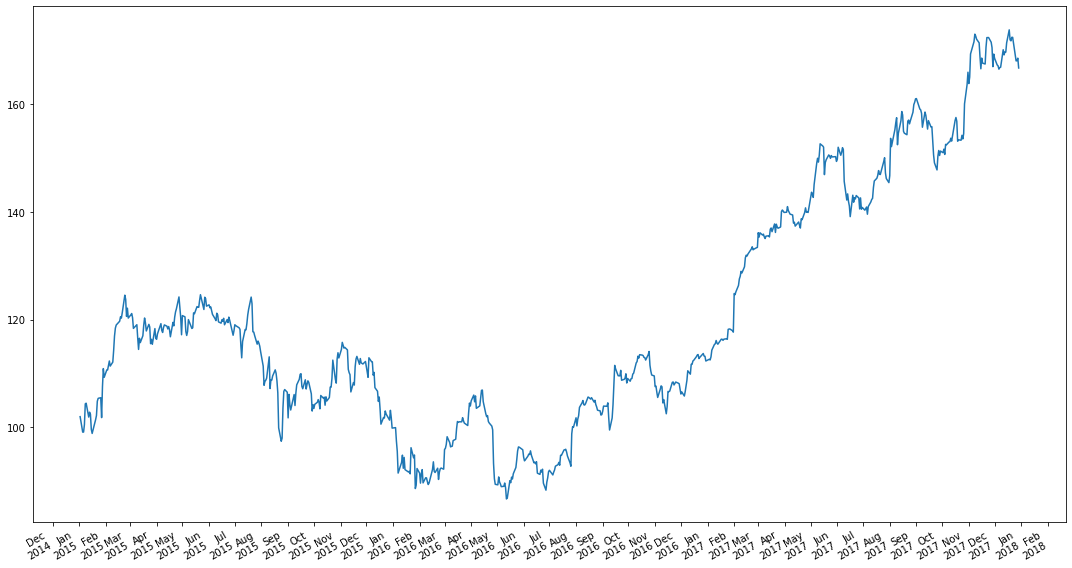

In [ ]:
import matplotlib.dates as dates

fig, ax = plt.subplots(figsize=(15,8))
ax.plot_date(index, stock, '-')
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y')) # 포맷 변경
fig.autofmt_xdate() 
plt.tight_layout() 